# Module loading and function defined

In [ ]:
import mlrose_hiive
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
from IPython.display import display
import IPython.display as ipd
import mlrose_hiive
from functools import partial
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn.covariance import ShrunkCovariance, LedoitWolf

# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*np.sin(2*np.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound
random_seed = 56

In [ ]:
# =================== diabetes =========================
# load file
diabetes_dataset = pd.read_csv("diabetes.csv")

# check if there's any NA for both files, if yes, then drop
diabetes_dataset.isnull().any().any()
diabetes_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
# print("diabetes information:", diabetes_dataset.info())

# remove unnecessary column
cleaned_diabetes_data = diabetes_dataset.drop(columns = ["PatientID"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_diabetes_data.values)
cleaned_diabetes_data = pd.DataFrame(normalized, columns = cleaned_diabetes_data.columns)
# print(cleaned_diabetes_data.shape)
cleaned_diabetes_data.head(n = 10)

diabetes_X = cleaned_diabetes_data.copy(deep= True).drop("Diabetic", axis=1)
diabetes_y = cleaned_diabetes_data.copy(deep= True)[["Diabetic"]]

diabetes_X.info(), diabetes_y.info()


# =================== phishing =========================
# load file
phishing_dataset = pd.read_csv("phishing.csv")

# check if there's any NA for both files, if yes, then drop
phishing_dataset.isnull().any().any()
phishing_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
random_seed = 56
# print("phishing information:", phishing_dataset.info())

# remove unnecessary column
cleaned_phishing_data = phishing_dataset.drop(columns = ["Index"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_phishing_data.values)
cleaned_phishing_data = pd.DataFrame(normalized, columns = cleaned_phishing_data.columns)
cleaned_phishing_data.head(n = 10)

# trainng data    
phishing_X = cleaned_phishing_data.copy(deep= True).drop("class", axis=1)
phishing_y = cleaned_phishing_data.copy(deep= True)[["class"]]

phishing_X.info(), phishing_y.info()

In [17]:
phishing_dataset = pd.read_csv("phishing.csv")
diabetes_dataset = pd.read_csv("diabetes.csv")

diabetes_dataset.drop(["PatientID"], axis=1 ,inplace=True)

diabetesX = diabetes_dataset.drop("Diabetic", 1).copy().values
diabetesY = diabetes_dataset["Diabetic"].copy().values
diabetes_x_df = diabetes_dataset.drop("Diabetic",1)


phishing_dataset.drop(["Index"], axis=1 ,inplace=True)
phishingX = phishing_dataset.drop("class", 1).copy().values
phishingY = phishing_dataset["class"].copy().values
phishing_x_df = phishing_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
diabetesX = min_max_scaler.fit_transform(diabetesX)
diabetesX_df = pd.DataFrame(diabetesX, columns=diabetes_x_df.columns)
phishingX = min_max_scaler.fit_transform(phishingX)
phishingX_df = pd.DataFrame(phishingX, columns=phishing_x_df.columns)

## Dimension reduction using RP on datasets

## diabetes

1 :  0.13036108412003913
2 :  0.11158152587545694
3 :  0.05168649691430575
4 :  0.03482400570388338
5 :  0.022049550506090112
6 :  0.012781039199999122
7 :  0.006356294327494489
8 :  4.1957407984513926e-30


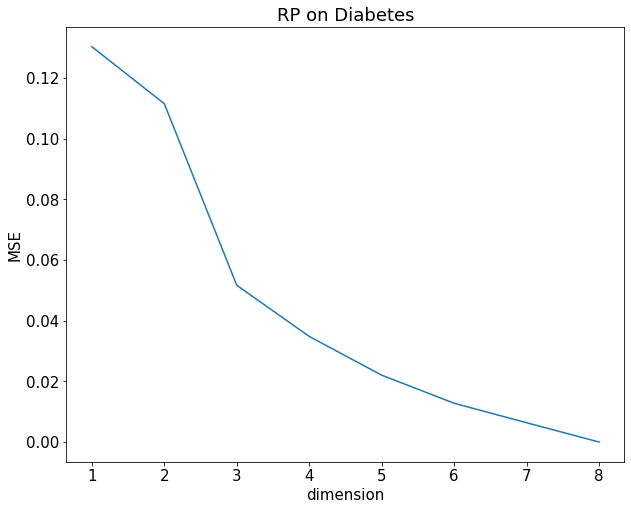

In [19]:
dims_diabetes = list(range(1,diabetesX_df.shape[1] + 1,1))
mse_dict = {}
for dim in dims_diabetes:
    rp = GaussianRandomProjection(n_components = dim, random_state=random_seed)
    rp.fit_transform(diabetesX_df.values)
    rebuild = np.dot(rp.fit_transform(diabetesX_df.values), np.linalg.pinv(rp.components_.T))
    mse = mean_squared_error(diabetesX_df.values, rebuild)    
    mse_dict[dim] = mse
    print(dim, ": ", mse)
        
plt.figure()
plt.plot(list(mse_dict.keys()), list(mse_dict.values()))
plt.xlabel("dimension")
plt.ylabel("MSE")
plt.title("RP on Diabetes")
plt.show()



In [20]:
comp = 3
all_rp = GaussianRandomProjection(n_components = comp, random_state = random_seed)
rp_results = all_rp.fit_transform(diabetesX_df.values)
for i in range(comp):
    key_name = "RP-"+str(i + 1)
    diabetesX_df[key_name] = rp_results[:,i]
    diabetes_dataset[key_name] = rp_results[:,i]
diabetes_rp_3 = rp_results

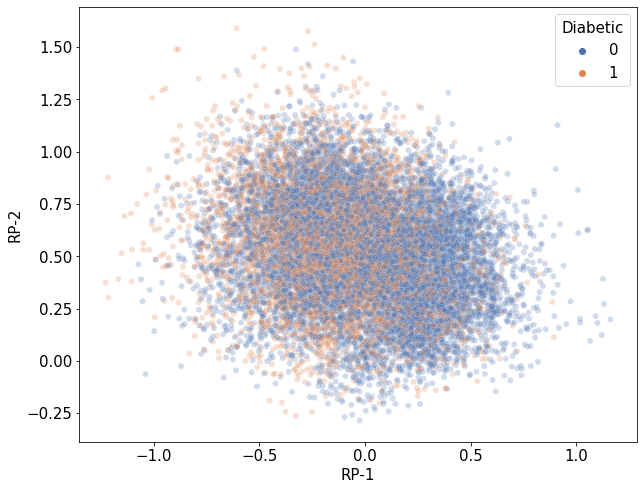

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="RP-1", 
    y="RP-2",
    hue="Diabetic",
    palette= "deep",
    data = diabetes_dataset,
    legend="full",
    alpha=0.25,
    cmap = "plasma"
)

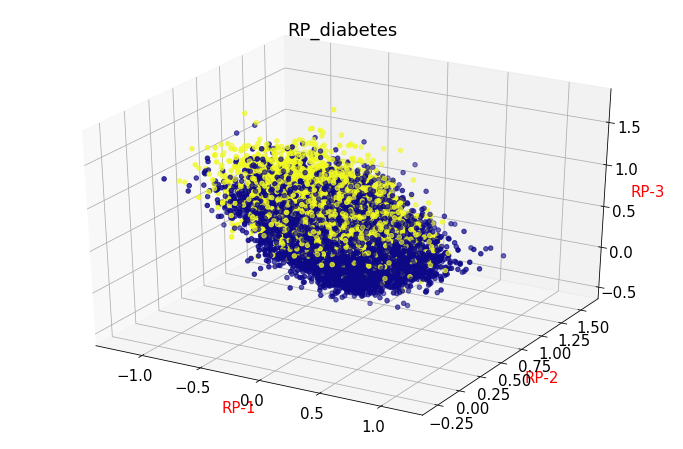

In [22]:
rndperm = np.random.permutation(diabetes_dataset.shape[0])
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs = diabetes_dataset.loc[rndperm,:]["RP-1"], 
    ys = diabetes_dataset.loc[rndperm,:]["RP-2"], 
    zs = diabetes_dataset.loc[rndperm,:]["RP-3"], 
    c = diabetes_dataset.loc[rndperm,:]["Diabetic"], 
    cmap='plasma'
)
ax.set_title("RP_diabetes")
ax.set_xlabel('RP-1', fontsize = 15, color = "red")
ax.set_ylabel('RP-2', fontsize = 15, color = "red")
ax.set_zlabel('RP-3', fontsize = 15, color = "red")
plt.show()

## phishing

1 :  0.616333580463311
2 :  0.5489049100278678
3 :  0.5435886294561496
4 :  0.43661845389044524
5 :  0.430840574882188
6 :  0.4127214466571903
7 :  0.4081407829786974
8 :  0.37340590239882215
9 :  0.3639358034197952
10 :  0.3563701260409611
11 :  0.2971912219328749
12 :  0.2799740103572214
13 :  0.26455645921858756
14 :  0.2585413755127874
15 :  0.2522855599574901
16 :  0.24766230144940762
17 :  0.2422439668121197
18 :  0.23411301014664726
19 :  0.1737169259868011
20 :  0.16198258640224908
21 :  0.15799667770619438
22 :  0.15081638402729602
23 :  0.13536345656215934
24 :  0.12836202105200767
25 :  0.06604117766169876
26 :  0.045859019070560995
27 :  0.02068920094858776
28 :  0.013098521924132163
29 :  0.008141798537799984
30 :  1.8060400713928667e-29


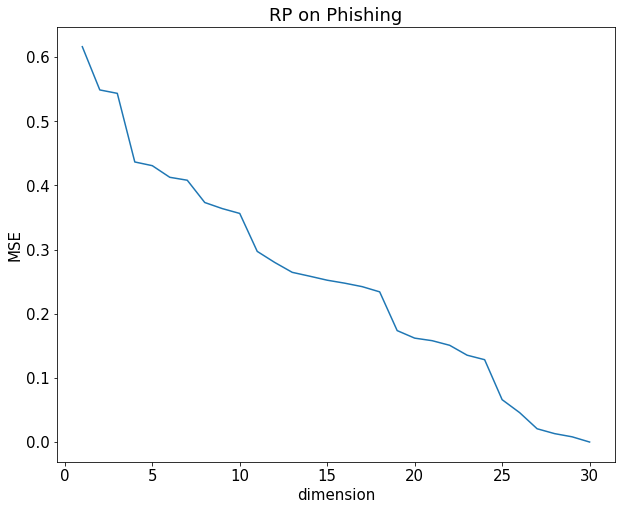

In [23]:
dims_phishing = list(range(1,phishingX_df.shape[1] + 1,1))
mse_dict = {}
for dim in dims_phishing:
    rp = GaussianRandomProjection(n_components = dim, random_state=random_seed)
    rp.fit_transform(phishingX_df.values)
    rebuild = np.dot(rp.fit_transform(phishingX_df.values), np.linalg.pinv(rp.components_.T))
    mse = mean_squared_error(phishingX_df.values, rebuild)    
    mse_dict[dim] = mse
    print(dim, ": ", mse)
    
plt.figure()
plt.plot(list(mse_dict.keys()), list(mse_dict.values()))
plt.xlabel("dimension")
plt.ylabel("MSE")
plt.title("RP on Phishing")
plt.show()

In [24]:
comp = 19
all_rp = GaussianRandomProjection(n_components = comp, random_state = random_seed)
rp_results = all_rp.fit_transform(phishingX_df.values)
for i in range(comp):
    key_name = "RP-"+str(i + 1)
    phishingX_df[key_name] = rp_results[:,i]
    phishing_dataset[key_name] = rp_results[:,i]
phishing_rp_19 = rp_results

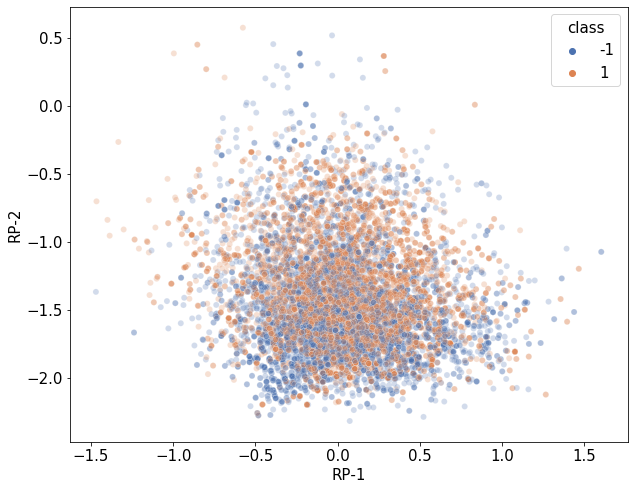

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="RP-1", 
    y="RP-2",
    hue="class",
    palette= "deep",
    data = phishing_dataset,
    legend="full",
    alpha=0.25,
    cmap = "plasma"
)

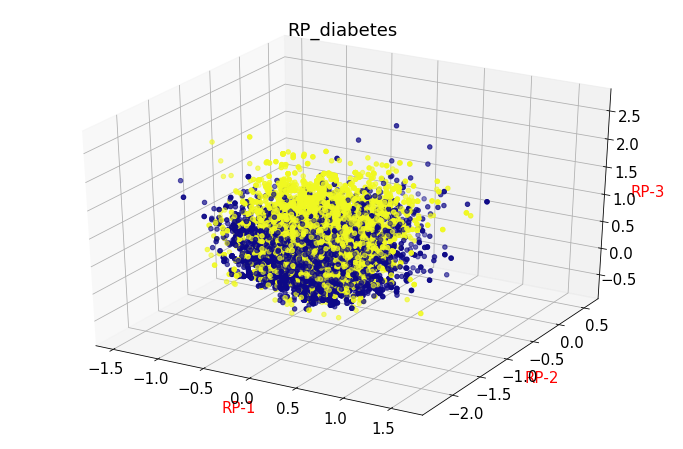

In [26]:
rndperm = np.random.permutation(phishing_dataset.shape[0])
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs = phishing_dataset.loc[rndperm,:]["RP-1"], 
    ys = phishing_dataset.loc[rndperm,:]["RP-2"], 
    zs = phishing_dataset.loc[rndperm,:]["RP-3"], 
    c = phishing_dataset.loc[rndperm,:]["class"], 
    cmap='plasma'
)
ax.set_title("RP_diabetes")
ax.set_xlabel('RP-1', fontsize = 15, color = "red")
ax.set_ylabel('RP-2', fontsize = 15, color = "red")
ax.set_zlabel('RP-3', fontsize = 15, color = "red")
plt.show()

## Dimension reduction using RP, clustering using K-means

## diabetes

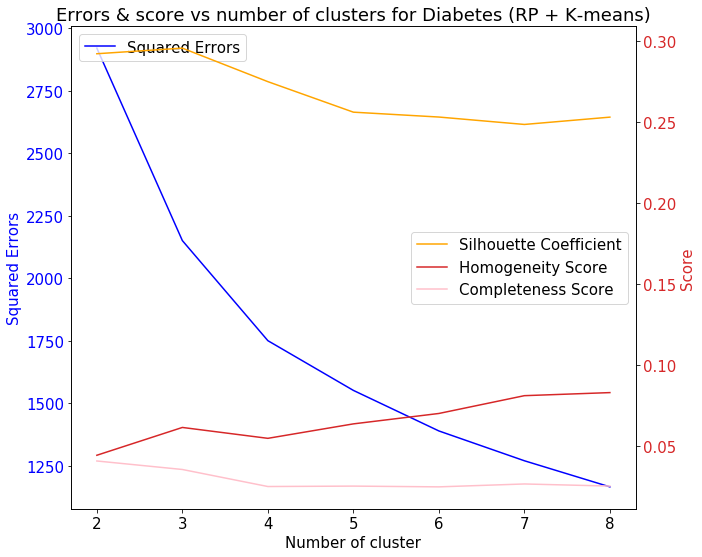

In [27]:
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score
clusters_range = list(range(2,9,1))
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(diabetes_rp_3)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(diabetes_rp_3, k_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, k_label)
    com_score = completeness_score(diabetesY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(com_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (RP + K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## phishing

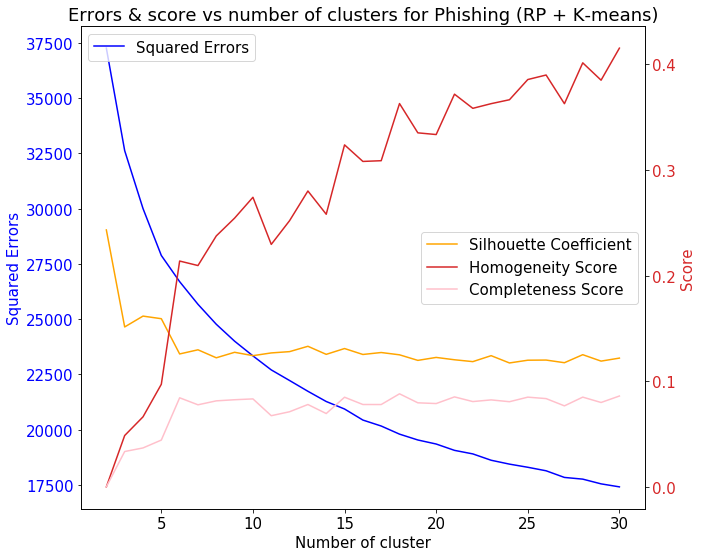

In [28]:
clusters_range = list(range(2,31,1))
SE = []
silh = []
homog = []
CS = []
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_seed, 
                    n_jobs=-2, algorithm = "auto").fit(phishing_rp_19)
    k_label = kmeans.labels_
    sil_coeff = silhouette_score(phishing_rp_19, k_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, k_label)
    CS_score = completeness_score(phishingY, k_label)
    silh.append(sil_coeff)
    homog.append(homog_score)
    SE.append(kmeans.inertia_)
    CS.append(CS_score)
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Squared Errors', color="blue")
ln1 = ax1.plot(clusters_range, SE, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh, color="orange")
ln3 = ax2.plot(clusters_range, homog, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Phishing (RP + K-means)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Dimension reduction using PCA, clustering using EM

## diabetes

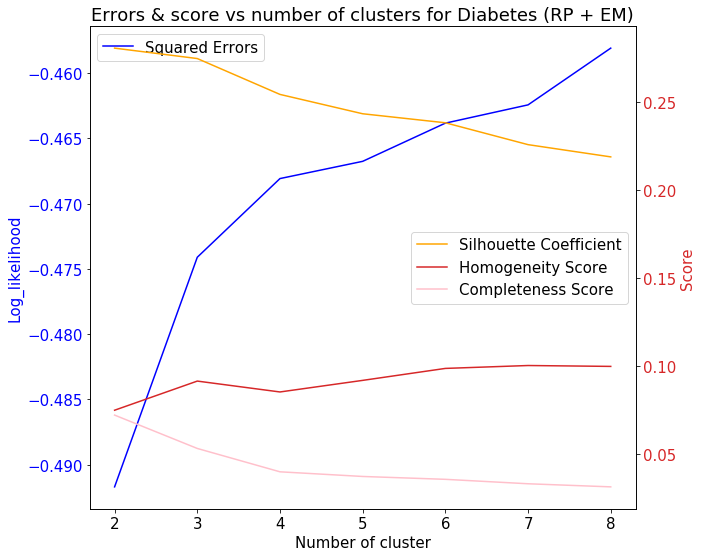

In [29]:
clusters_range = list(range(2,9,1))
log_likelihood_EM = []
silh_EM = []
homog_EM = []
CS = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(diabetes_rp_3)
    gmm_label = gmm.predict(diabetes_rp_3)
    sil_coeff = silhouette_score(diabetes_rp_3, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(diabetesY, gmm_label)
    comp_score = completeness_score(diabetesY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    CS.append(comp_score)
    log_likelihood_EM.append(gmm.score(diabetes_rp_3))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    
    
# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ['Squared Errors']
labels_2 = ["Silhouette Coefficient", "Homogeneity Score", "Completeness Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Log_likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ln4 = ax2.plot(clusters_range, CS, color="pink")
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors & score vs number of clusters for Diabetes (RP + EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## phishing

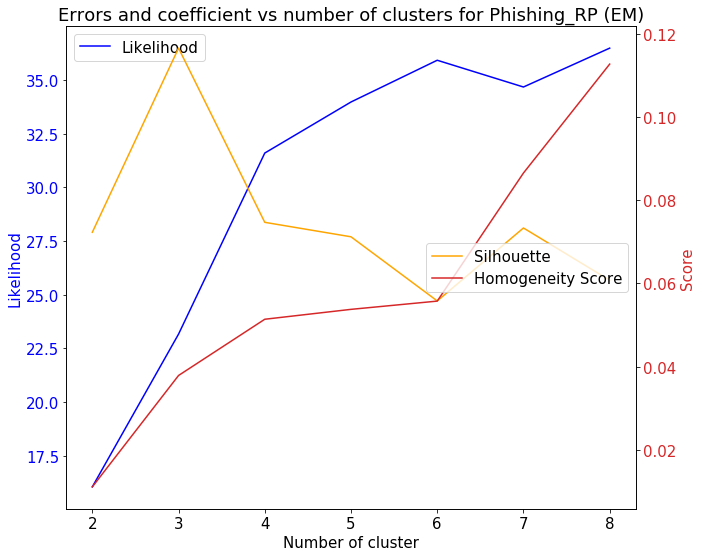

In [30]:
log_likelihood_EM = []
silh_EM = []
homog_EM = []
for cluster in clusters_range:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(phishing_rp_26)
    gmm_label = gmm.predict(phishing_rp_26)
    sil_coeff = silhouette_score(phishing_rp_26, gmm_label, metric='euclidean')
    homog_score = homogeneity_score(phishingY, gmm_label)
    silh_EM.append(sil_coeff)
    homog_EM.append(homog_score)
    log_likelihood_EM.append(gmm.score(phishing_rp_26))
    print("the calculation progress is: " + str(int(cluster / clusters_range[-1] * 100)) + "%", end = "\r")
    

# ========== plotting
# Create some mock data
fig = plt.figure()
ax1 = fig.add_subplot(111)
labels_1 = ["Likelihood"]
labels_2 = ["Silhouette", "Homogeneity Score"]

color = 'black'
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Likelihood', color="blue")
ln1 = ax1.plot(clusters_range, log_likelihood_EM, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Score', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(clusters_range, silh_EM, color="orange")
ln3 = ax2.plot(clusters_range, homog_EM, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("Errors and coefficient vs number of clusters for Phishing_RP (EM)")
ax1.legend(labels_1, loc = 2)
ax2.legend(labels_2, loc = 7)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()